# Estudo sobre Previsão de Vendas Utilizando Séries Temporais

## Parte 1: Análise Exploratória de Dados

### 1. Definição

Uma série temporal é uma sequência de dados ou observações coletadas e **ordenadas no tempo**. Cada dado ou ponto da série representa uma medição ou evento associado a um momento específico, podendo ser um instante ou um intervalo de tempo.

### 2. Características principais de uma série temporal
1. **Ordem temporal:** Os dados estão ordenados cronologicamente, e essa ordem importa para a análise.  

2. **Dependência temporal:** Os valores futuros podem depender dos valores passados, ou seja, há uma relação entre os pontos da série.  

3. **Frequência:** As observações podem ser coletadas em intervalos regulares (diários, mensais, anuais, etc.) ou irregulares.  

### 3. Classificação quanto ao número de variáveis independentes  

- *Série Temporal Univariada*  
  Contém apenas uma variável dependente, ou seja, uma única sequência de observações ao longo do tempo.  
  
  Exemplos:  
  Previsão de vendas semanais de uma loja.  
  Previsão da temperatura diária de uma cidade.

- *Série Temporal Multivariada*  
  Contém múltiplas variáveis, incluindo uma variável dependente e outras variáveis independentes que podem influenciá-la.  

  Exemplo:  
  Previsão de vendas semanais considerando fatores como temperatura, preço do combustível e taxa de desemprego.  
  Previsão de geração de energia considerando dados climáticos como vento, radiação solar e precipitação.



### 4. Componentes de um série temporal  

- **Tendência (Trend)**:
Representa a direção geral da série ao longo do tempo (crescimento, decrescimento ou estabilidade). Refere-se ao movimento de longo prazo ou direção geral da série temporal.  

- **Sazonalidade (Seasonality)**:
Padrões cíclicos que se repetem em **intervalos regulares**, como variações anuais ou mensais.  

- **Ciclos (Cycles)**:
Flutuações mais longas e irregulares, geralmente associadas a eventos econômicos ou sociais.  

- **Ruído (Noise)**:
Variações aleatórias ou imprevisíveis que não seguem nenhum padrão identificável.

<br>

#### 4.1. Representação Matemática de uma série temporal
A representação matemática de uma série temporal pode ser expressa de maneira geral por duas formas principais, dependendo da relação entre os componentes: **aditiva** e **multiplicativa**.  

<br>

No modelo aditivo, a série temporal ($Y_t$) é a soma de suas componentes:

$$
Yt= T_t + S_t + C_t +E_t​​
$$

-   $T_t$ ​: **Tendência** - Representa o movimento de longo prazo.

-   $S_t$​: **Sazonalidade** - Reflete padrões regulares e periódicos.

-   $C_t$​: **Ciclo** - Oscilações de médio a longo prazo sem periodicidade fixa.

-   $E_t$​: **Ruído** - Componentes aleatórios e imprevisíveis.

<br>

<br>

No modelo multiplicativo, a série temporal é o produto de suas componentes:

$$
Y_t=T_t \times S_tx \times C_t \times E_t
$$

Ou, alternativamente, em uma forma log-transformada para linearizar o modelo:

$$
ln(Y_t)=ln(T_t)+ln(S_t)+ln(C_t)+ln(E_t)
$$

-   $T_t$ ​: **Tendência** - Representa o movimento de longo prazo.

-   $S_t$​: **Sazonalidade** - Reflete padrões regulares e periódicos.

-   $C_t$​: **Ciclo** - Oscilações de médio a longo prazo sem periodicidade fixa.

-   $E_t$​: **Ruído** - Componentes aleatórios e imprevisíveis.

<br>

#### Escolha do Modelo

-   **Aditivo**: Usado quando a amplitude dos componentes sazonais e cíclicos não muda ao longo do tempo.

-   **Multiplicativo**: Usado quando a amplitude dos componentes sazonais e cíclicos aumenta ou diminui proporcionalmente à tendência.

<br>

#### Um guia para modelos de séries temporais

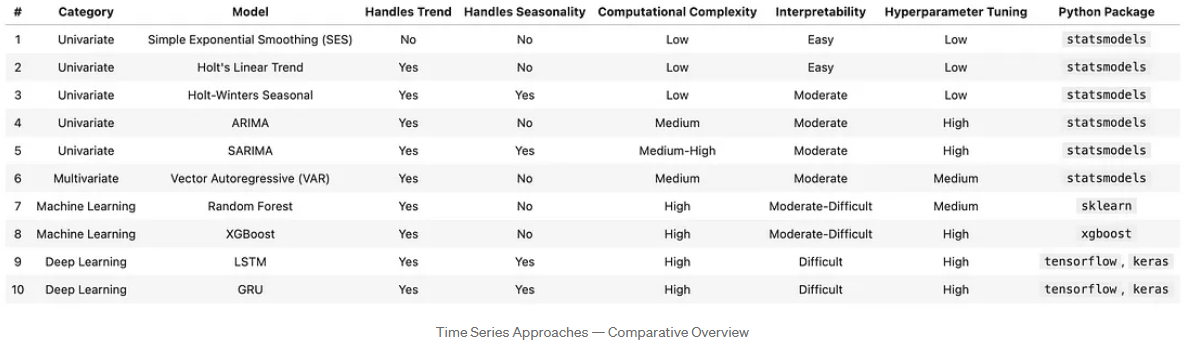

Fonte: https://medium.com/towards-data-science/time-series-from-analyzing-the-past-to-predicting-the-future-249ab99ec52d

<br>

---

## Aplicação prática

### Instalar as bibliotecas necessárias

In [5]:
! pip install kagglehub
! pip install google

### Carregar as bibliotecas necessárias

In [10]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy.stats import skew, kurtosis

from datetime import datetime

# Realizar download do dataset a partir do Kaggle
import kagglehub

# Mapear o Google Drive no Colab e realizar download de arquivos do COlab para máquina local
import google
from google.colab import drive, files

# Eliminar warnings
import warnings
warnings.simplefilter("ignore", category=UserWarning)

ModuleNotFoundError: No module named 'google'

### Carregar os arquivos de dados

In [2]:
# Mapeia Google Drive
drive.mount('/content/drive')

# Cria diretório no Google Colab para armazenar a Kaggle Key
! mkdir ~/.kaggle

# Copia Kaggle Key do Google Drive para o Colab
!cp /content/drive/MyDrive/Projetos/Kaggle/kaggle.json ~/.kaggle/kaggle.json

# Faz o download da base de dados diretamente do Kaggle
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting
print('Download finalizado')

# Descompacta o arquivo zip com o dataset
! unzip walmart-recruiting-store-sales-forecasting.zip > unzip_log.txt 2>&1
! rm -rf walmart-recruiting-store-sales-forecasting.zip
print('walmart-recruiting-store-sales-forecasting.zip descompactado')

# Descompacta os arquivos individuais
! unzip features.csv.zip > unzip_log.txt 2>&1
! rm -rf features.csv.zip
print('Arquivo features.zip descompactado')

! unzip train.csv.zip > unzip_log.txt 2>&1
! rm -rf train.csv.zip
print('Arquivo train.zip descompactado')

! unzip test.csv.zip > unzip_log.txt 2>&1
! rm -rf test.csv.zip
print('Arquivo test.zip descompactado')

! unzip sampleSubmission.csv.zip > unzip_log.txt 2>&1
! rm -rf sampleSubmission.csv.zip
print('Arquivo sampleSubmission.zip descompactado')

Mounted at /content/drive
  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 122MB/s]
Download finalizado
walmart-recruiting-store-sales-forecasting.zip descompactado
Arquivo features.zip descompactado
Arquivo train.zip descompactado
Arquivo test.zip descompactado
Arquivo sampleSubmission.zip descompactado


### Carregar os dataframes

In [3]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Análise Detalhada dos Dados

####**Dataset Features**

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


<br>

##### Análise das dimensões do dataset  

In [ ]:
dimensao_features = features.shape

print(f'Número de observações: {dimensao_features[0]}')
print(f'Número de variáveis: {dimensao_features[1]}')

Número de observações: 8190
Número de variáveis: 12


<br>

##### Análise dos tipos de dados

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# Número de lojas
lojas = features['Store'].nunique()

# Número de dias observados
dias = features['Date'].nunique()

# Menor data
data_inicial = features['Date'].min()

# Maior data
data_final = features['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

Número de lojas: 45
Número de dias observador: 182
Data inicial: 2010-02-05
Data final: 2013-07-26


<br>

##### Análise de valores faltantes

In [ ]:
# Número de valores faltantes
falta_features = features.isna().sum()
print(falta_features)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [ ]:
# % de valores faltantes com duas casas decimais
falta_features_percent = round(100 * falta_features / len(features), 2)
print(falta_features_percent)

Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       50.77
MarkDown2       64.33
MarkDown3       55.89
MarkDown4       57.70
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
IsHoliday        0.00
dtype: float64


In [ ]:
# Quais são as datas com valores faltantes em CPI ?
datas = features['Date'][features['CPI'].isna()].unique()

# Ordenar as datas
datas.sort()

print(f'Datas com valores faltantes: {datas}')

Datas com valores faltantes: ['2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24' '2013-05-31'
 '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28' '2013-07-05'
 '2013-07-12' '2013-07-19' '2013-07-26']


In [ ]:
# Quais são as datas com valores faltantes em Unemployment ?
datas = features['Date'][features['Unemployment'].isna()].unique()

# Ordenar as datas
datas.sort()

print(f'Datas com valores faltantes: {datas}')

Datas com valores faltantes: ['2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24' '2013-05-31'
 '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28' '2013-07-05'
 '2013-07-12' '2013-07-19' '2013-07-26']


Existem dados faltantes nas variáveis MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI e Unemployment.  

CPI e Unemployment possuem aproximadamente 7% de dados faltantes, o que será solucionado por meio de imputação de dados.  

O elevado número de valores faltantes nas variáveis MarkDown devem-se ao fato de não ocorreram promoções todos os dias onde a medição foi realizada, ou seja, quando MarkDown1-6 é diferente de zero, significa que naquela data houve promoção, já quando o valor é zero, não houve promoção na data.  

<br>

##### Análise de dados duplicados

In [ ]:
features.duplicated().sum()

0

Não há dados duplicados

<br>

##### Análise numérica

###### Medidas de Tendência Central e Dispersão

In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Análise:  

- No período estudado, as temperaturas variaram de -7,3$^o$F (-21,7$^o$C) a 101,9$^o$F (38,8$^o$C), com média de 59,3$^o$F (11,8$^o$C). O 4$^o$ quartil mostra que em 75% do tempo a temperatura não passou de 73.9$^o$F (23,3$^o$C).  
- O preço por galão do combustível variou de US\\$ 2.47 a US\\$ 4.47, com média de US\$ 3.40, isto é, houve um acréscimo de quase 81%, o que pode refletir em aumento nos custos do frete.  
Combustíveis mais caros também podem fazer com que clientes deixem de ir ao supermercado, preferindo a realização de compras online. Este fato gera impacto direto para a efetividade das promoções realizadas exclusivamente na loja.  
- As variáveis MarkDown representam descontos concedidos em certos períodos.   

In [15]:
var_numericas_features = features[['Temperature', 'Fuel_Price', 'MarkDown1',
                                   'MarkDown2', 'MarkDown3', 'MarkDown4',
                                   'MarkDown5', 'CPI', 'Unemployment']]

<br>

###### Análise da assimetria da distribuição

In [16]:
var_numericas_features.skew()

,0
Temperature,-0.283384
Fuel_Price,-0.305063
MarkDown1,4.016436
MarkDown2,4.962258
MarkDown3,8.133806
MarkDown4,4.864485
MarkDown5,50.277824
CPI,0.067668
Unemployment,1.067685


<br>

###### Análise do formato da distribuição

In [17]:
var_numericas_features.kurtosis()

,0
Temperature,-0.610884
Fuel_Price,-0.952388
MarkDown1,23.687167
MarkDown2,32.342187
MarkDown3,72.068075
MarkDown4,29.000294
MarkDown5,2923.056530
CPI,-1.832113
Unemployment,2.498221


<br>

###### Distribuição de frequências da variável qualitativa

In [18]:
features['IsHoliday'].value_counts()

,count
IsHoliday,
False,7605
True,585


<br>

##### Análise gráfica

###### Univariada

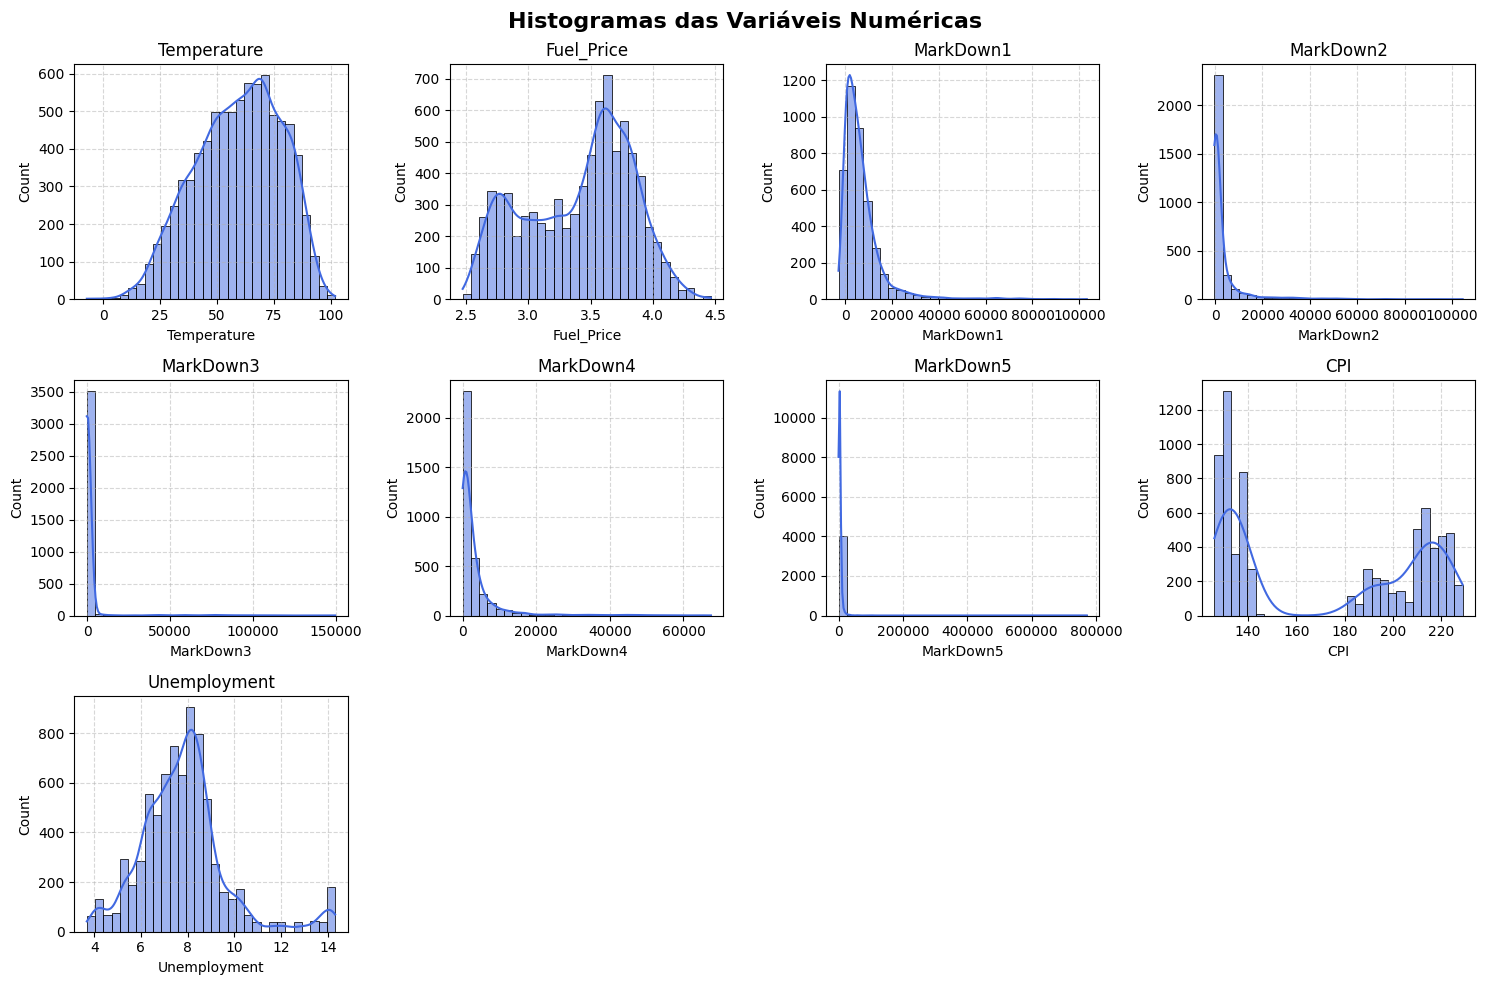

In [19]:
plt.figure(figsize=(15, 10))
plt.suptitle("Histogramas das Variáveis Numéricas", fontsize=16, fontweight='bold')

# Loop through each numerical column and plot a histogram
for i, col in enumerate(var_numericas_features.columns):
    plt.subplot(3, 4, i + 1)  # Adjust grid size if needed
    sns.histplot(var_numericas_features[col], bins=30, kde=True, color='royalblue')
    plt.title(col, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

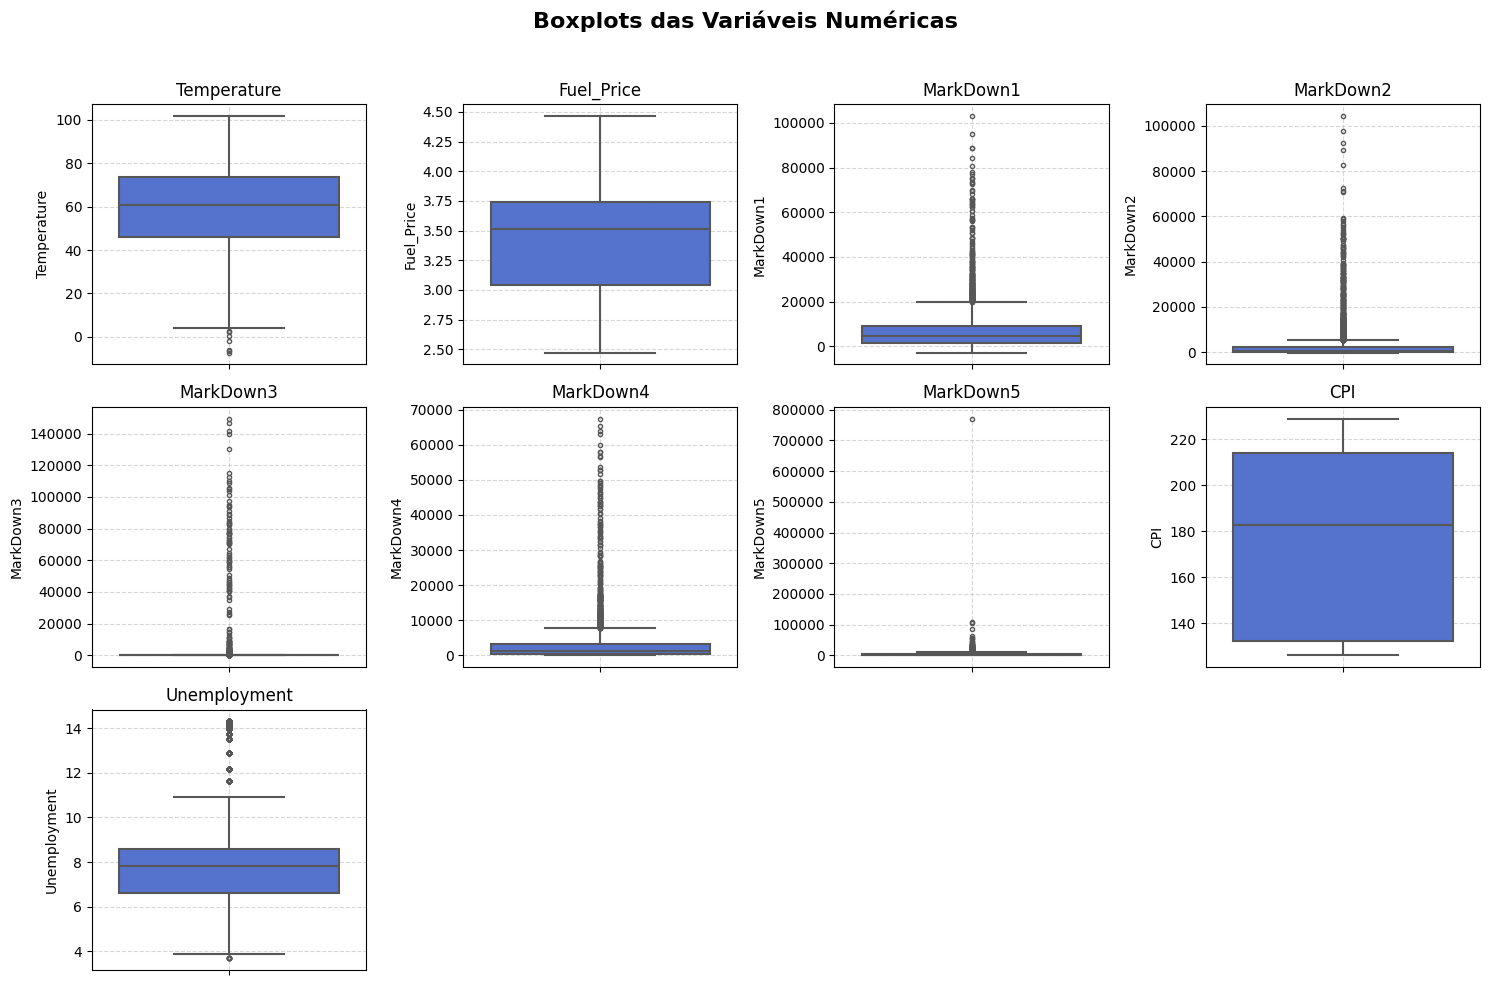

In [20]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots das Variáveis Numéricas", fontsize=16, fontweight='bold')

for i, col in enumerate(var_numericas_features.columns):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(y=var_numericas_features[col], color="royalblue", fliersize=3, linewidth=1.5)
  plt.title(col, fontsize=12)
  plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

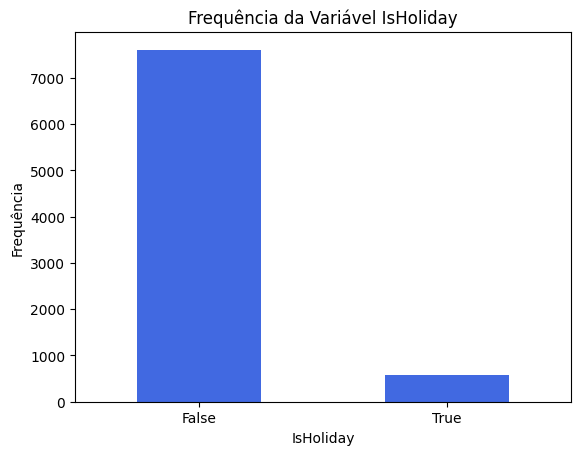

In [21]:
freq_isholliday = features['IsHoliday'].value_counts()
freq_isholliday.plot(kind='bar', color='royalblue')
plt.title('Frequência da Variável IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

<br>

Análise:  

<br>

###### Bivariada

<Figure size 1800x1500 with 0 Axes>

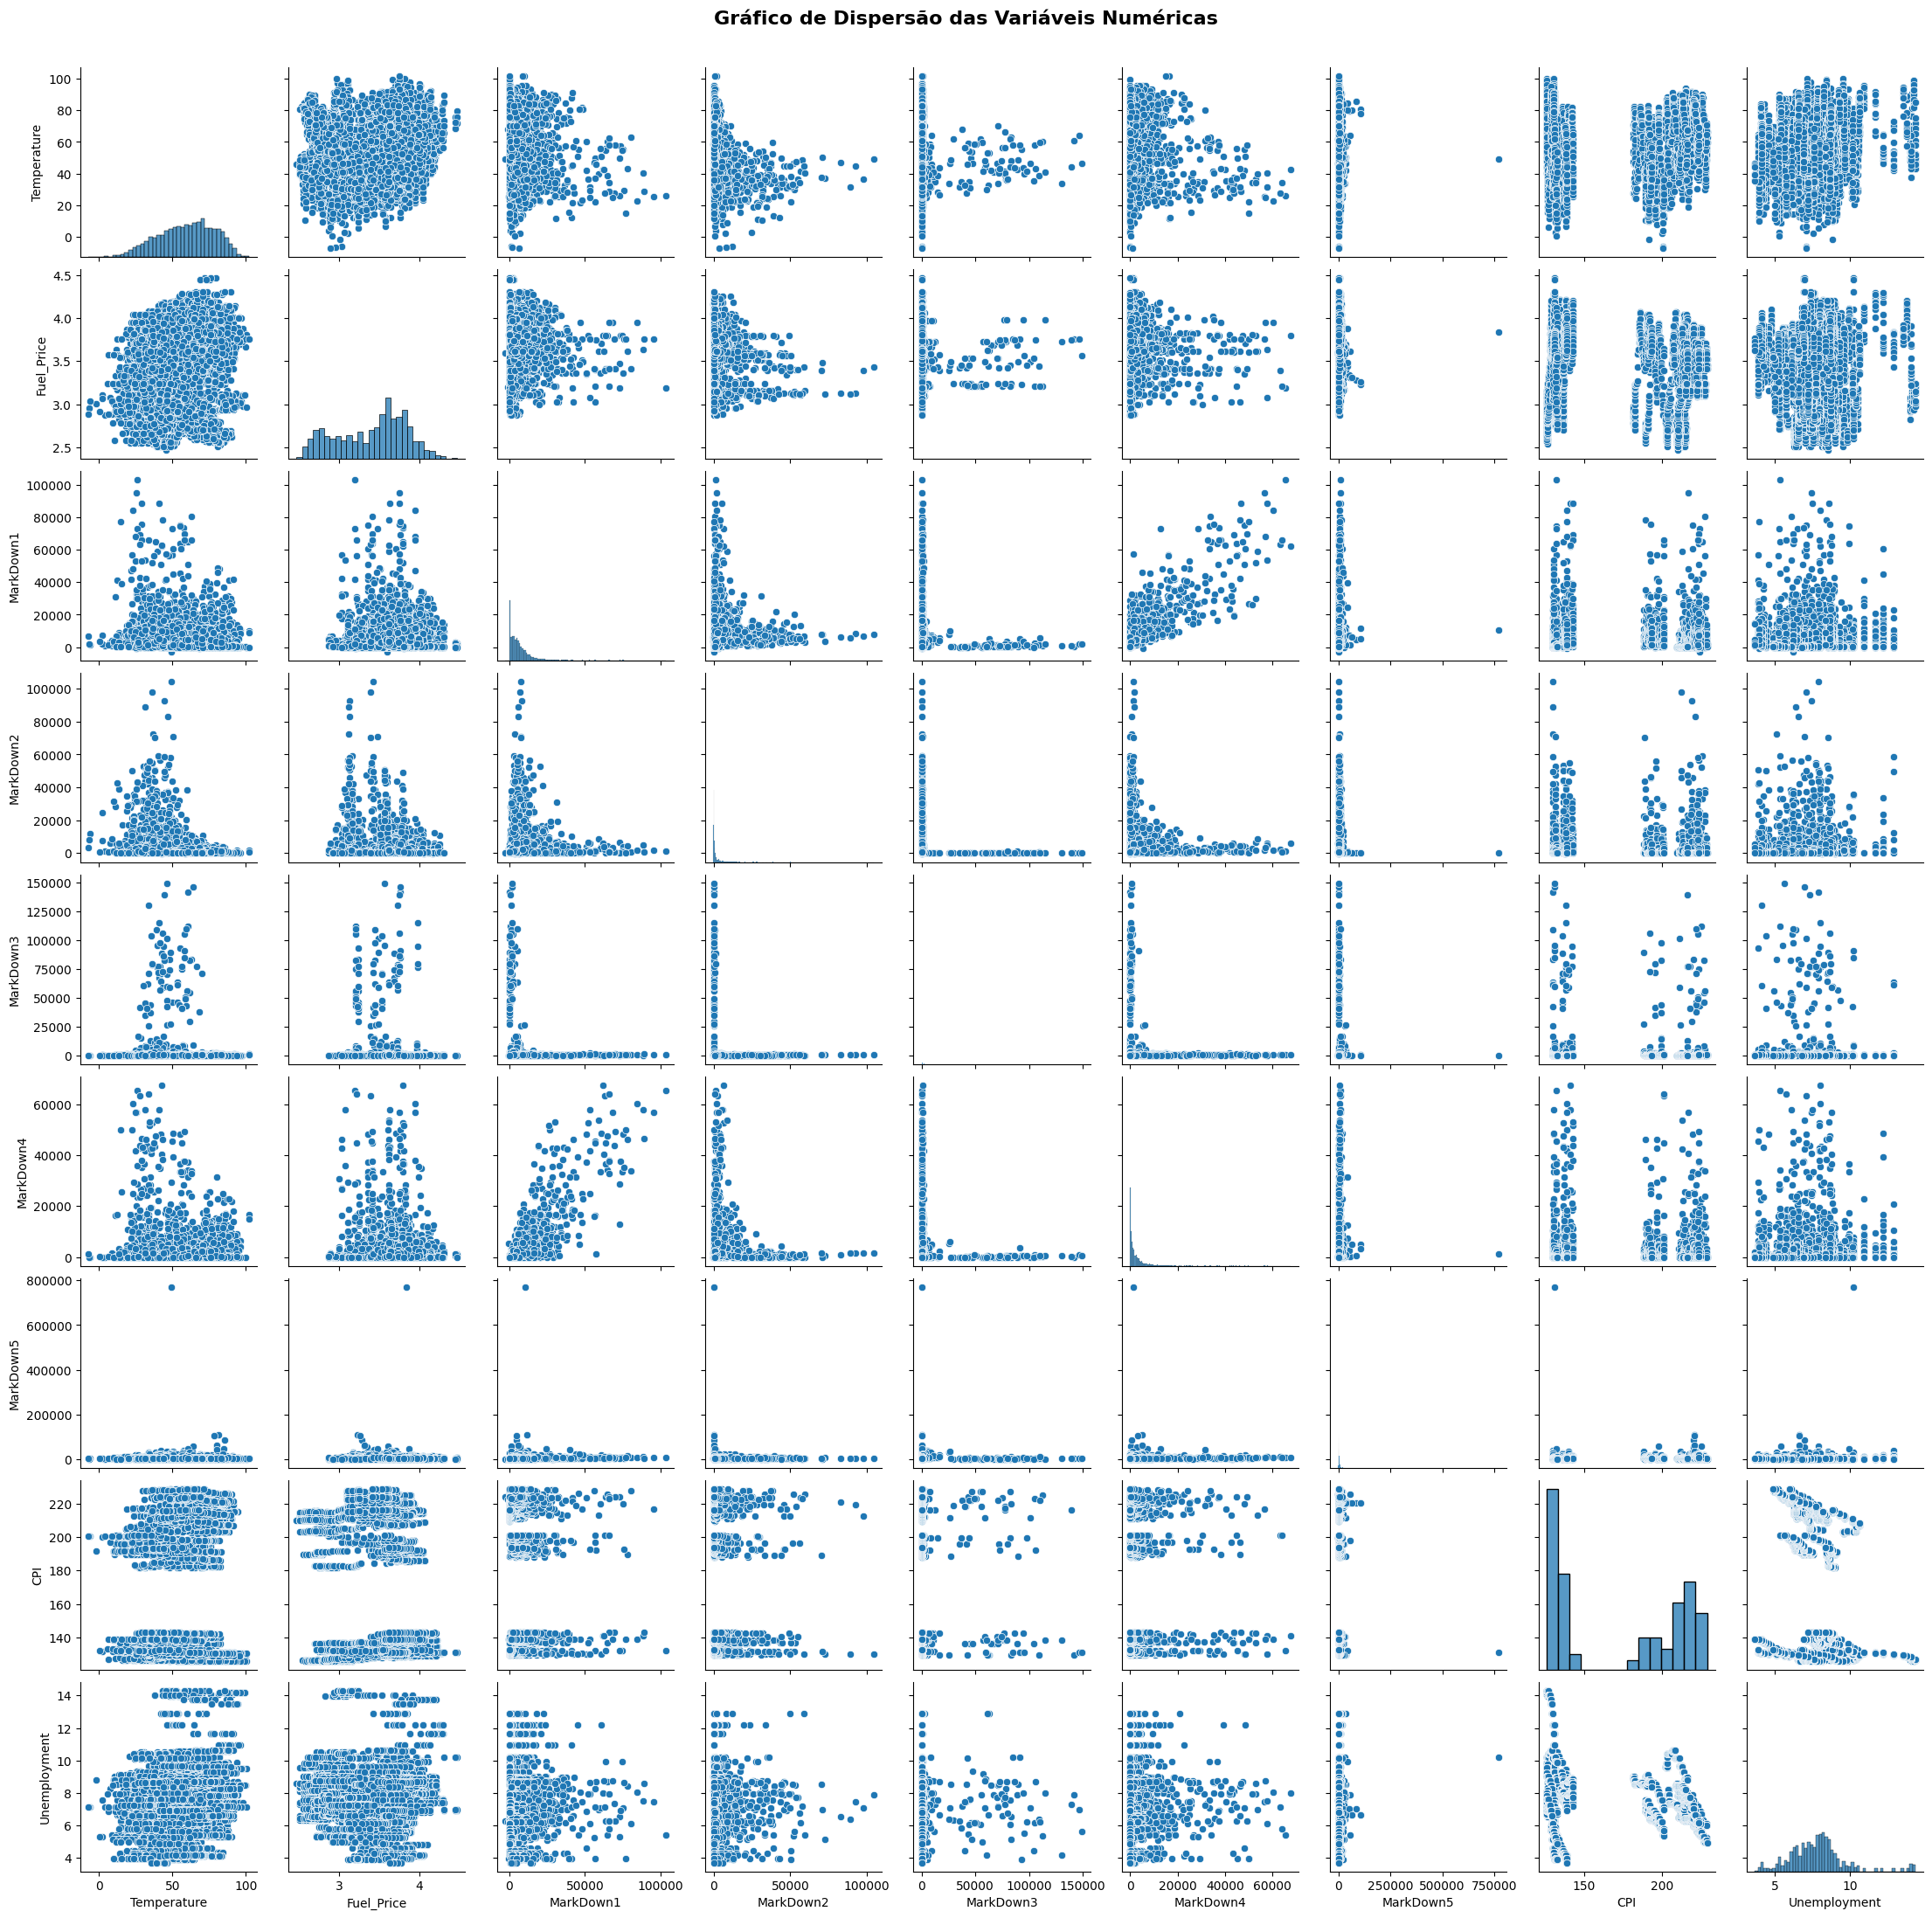

In [26]:
plt.figure(figsize=(18, 15))
sns.pairplot(var_numericas_features, diag_kind='hist', corner=False)
plt.suptitle("Gráfico de Dispersão das Variáveis Numéricas", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.show()

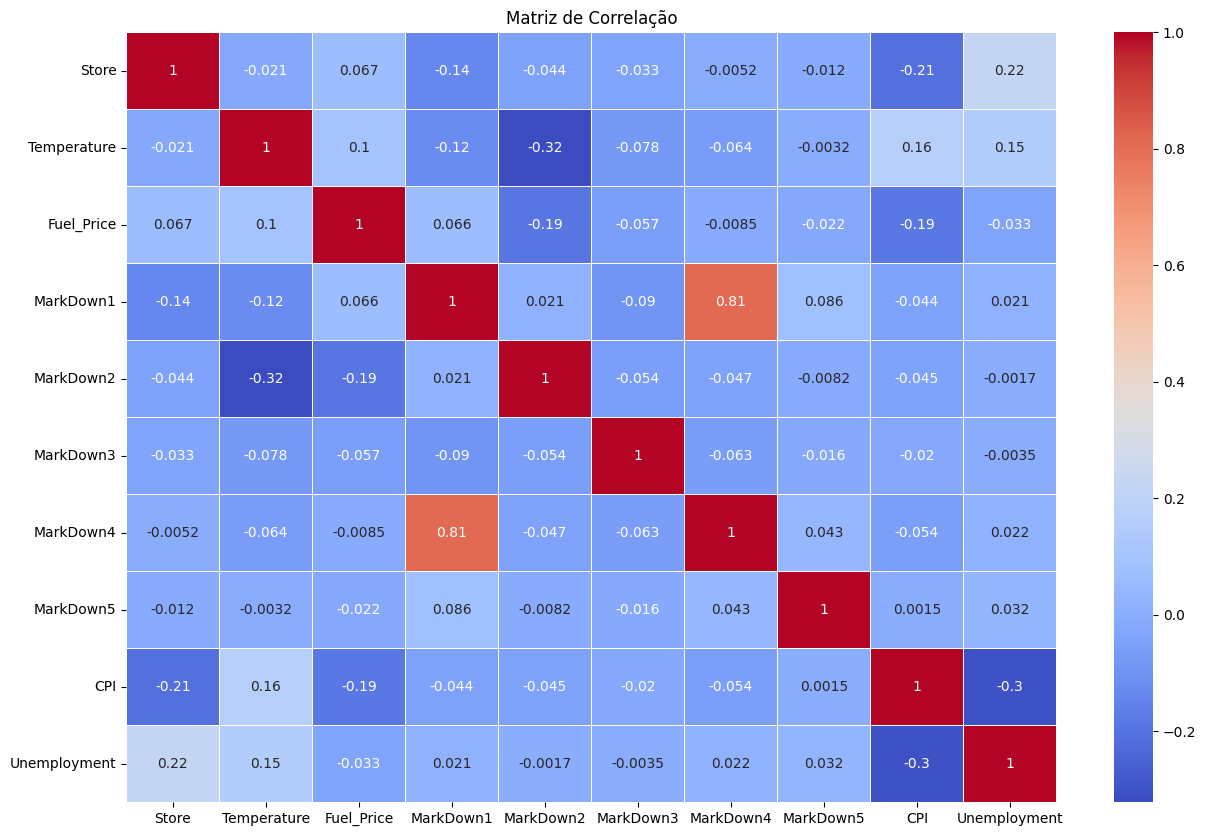

In [ ]:
corr_matrix = var_numericas.corr()
plt.figure(figsize=(15, 10))
plt.title('Matriz de Correlação')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

<br>



---

<br>

####**Dataset Stores**

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


<br>

##### Análise das dimensões do dataset

In [ ]:
dimensao_stores = stores.shape

print(f'Número de observações: {dimensao_stores[0]}')
print(f'Número de variáveis: {dimensao_stores[1]}')

Número de observações: 45
Número de variáveis: 3


<br>

##### Análise dos tipos de dados

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
# Número de lojas
lojas = stores['Store'].nunique()

#Tipos de loja
tipos = stores['Type'].unique()

# Número de cidades
cidades = stores['Size'].nunique()

print(f'Número de lojas: {lojas}')
print(f'Tipos de loja: {tipos}')
print(f'Número de cidades: {cidades}')

Número de lojas: 45
Tipos de loja: ['A' 'B' 'C']
Número de cidades: 40


<br>

##### Análise de valores faltantes

In [ ]:
stores_faltantes = stores.isna().sum()
print(stores_faltantes)

Store    0
Type     0
Size     0
dtype: int64


Não há dados faltantes

<br>

##### Análise de dados duplicados

In [ ]:
stores.duplicated().sum()

0

Não há dados duplicados

<br>

##### Análise numérica

###### Medidas de Tendência Central e Dispersão

In [ ]:
var_numericas = stores['Size']
var_categorica = stores['Type']

In [ ]:
var_numericas.describe()

,Size
count,45.000000
mean,130287.600000
std,63825.271991
min,34875.000000
25%,70713.000000
50%,126512.000000
75%,202307.000000
max,219622.000000


- 45 lojas foram analisadas.  
- Estas lojas possuem em média 130 mil pés quadrados (12 mil m$^2$).  
- Metade das lojas possuem até 126 mil pés quadrados ou (11 mil m$^2$).  
- A maior loja possui 219 mil pés quadrados (20 mil m$^2$) e a menor 34 mil pés quadrados (3 mil m$^2$).  


<br>

###### Análise da Assimetria da Distribuição

In [ ]:
var_numericas.skew()

-0.20006766031155365

A distribuição é levemente assimétrica à esquerda, o que indica a  

<br>

###### Análise do formato da distribuição

In [ ]:
var_numericas.kurtosis()

-1.3722478190470024

<br>

###### Tabela de Distribuição de Frequências da Variável Categórica

In [ ]:
var_categorica.value_counts()

,count
Type,
A,22
B,17
C,6


Type A: Lojas grandes (maior área fisica e maior potencial de vendas).  
Type B: Lojas de porte médio.  
Type C: Lojas menores (menor potencial de vendas e menor área física).  

Verificamos que a maioria das lojas são do tipo A e B, ou seja, grandes e médias.  

<br>

##### Análise gráfica

###### Univariada

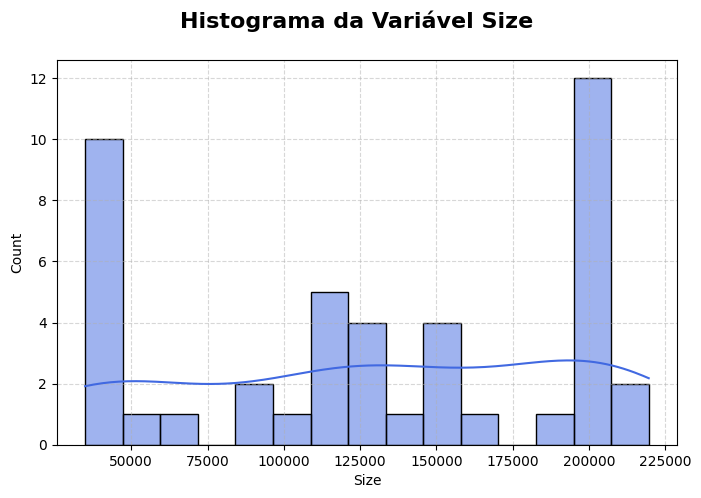

In [ ]:
plt.figure(figsize=(8, 5))
plt.suptitle("Histograma da Variável Size", fontsize=16, fontweight='bold')
sns.histplot(var_numericas, bins=15, kde=True, color='royalblue')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

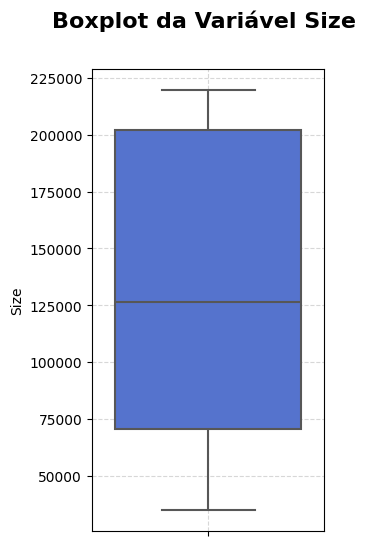

In [ ]:
plt.figure(figsize=(3,6))
plt.suptitle("Boxplot da Variável Size", fontsize=16, fontweight='bold')
sns.boxplot(y=var_numericas, color="royalblue", fliersize=3, linewidth=1.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

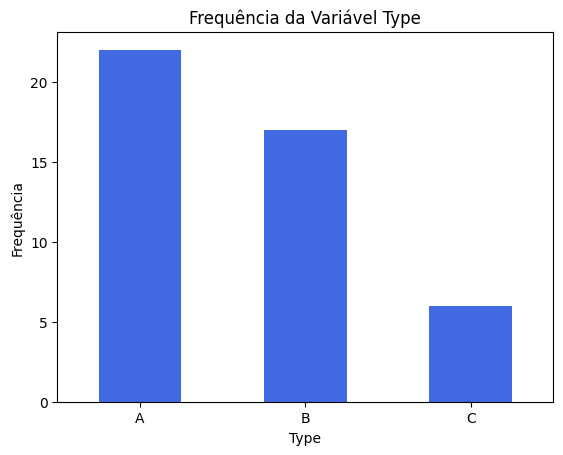

In [ ]:
freq_type = var_categorica.value_counts()
freq_type.plot(kind='bar', color='royalblue')
plt.title('Frequência da Variável Type')
plt.xlabel('Type')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

O gráfico ilustra o que foi dito em análise anterior, ou seja, das lojas analisadas, a maioria é do tipo A, tendo logo a seguir as lojas do tipo B.  

###### Bivariada

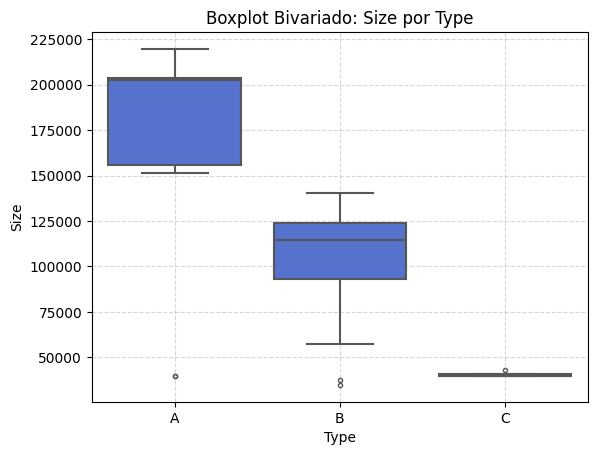

In [ ]:
sns.boxplot(x=var_categorica, y=var_numericas, color="royalblue", fliersize=3, linewidth=1.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.title('Boxplot Bivariado: Size por Type')
plt.xlabel('Type')
plt.ylabel('Size')

plt.show()

In [ ]:
stores[(stores['Size']<50000) & (stores['Type'] == 'A')]

,Store,Type,Size
32,33,A,39690
35,36,A,39910


In [ ]:
stores[(stores['Size']<50000) & (stores['Type'] == 'B')]

,Store,Type,Size
2,3,B,37392
4,5,B,34875


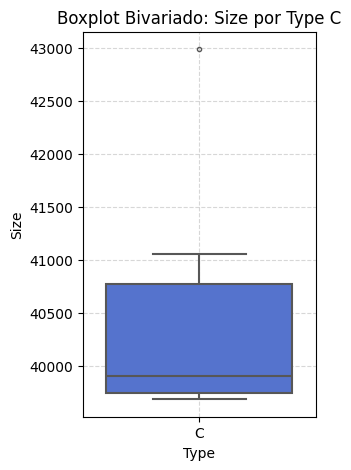

In [ ]:
plt.figure(figsize=(3,5))
cat = stores[stores['Type']=='C']
sns.boxplot(x=cat['Type'], y=var_numericas, color="royalblue", fliersize=3, linewidth=1.5)
plt.title('Boxplot Bivariado: Size por Type C')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
stores[((stores['Size']>42500) & (stores['Size']<43500)) & (stores['Type'] == 'C')]

,Store,Type,Size
29,30,C,42988


Observamos a correlação entre tipo e tamanho de loja, o que já era esperado. Isto é, as lojas do tipo A são as de maior tamanho e do tipo C as de menor tamanho.  

É possível identificar alguns possíveis outliers, sendo eles:  
- As lojas 33 e 36 são classificadas como do tipo A, embora possuam apenas 39 mil pés quadrados.  
- As lojas 3 e 5 são classificadas como do tipo B, embora possuam respectivamente 37 e 34 mil pés quadrados.  
- A loja 30 é classificada como do tipo C, embora possua aproximadamente 43 mil pés quadrados.  

---

<br>

#### **Dataset Train**

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


<br>

##### Análise das Dimensões do Dataset

In [6]:
dimensao_train = train.shape

print(f'Número de observações: {dimensao_train[0]}')
print(f'Número de variáveis: {dimensao_train[1]}')

Número de observações: 421570
Número de variáveis: 5


<br>

##### Análise dos Tipos de Dados


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
# Número de departamentos por loja
for loja in train['Store'].unique():
  print(f'\nLoja: {loja}')
  departamento = train['Dept'][train['Store'] == loja].nunique()
  print(f'Número de departamentos: {departamento}')



Loja: 1
Número de departamentos: 77

Loja: 2
Número de departamentos: 78

Loja: 3
Número de departamentos: 72

Loja: 4
Número de departamentos: 78

Loja: 5
Número de departamentos: 72

Loja: 6
Número de departamentos: 77

Loja: 7
Número de departamentos: 76

Loja: 8
Número de departamentos: 76

Loja: 9
Número de departamentos: 73

Loja: 10
Número de departamentos: 77

Loja: 11
Número de departamentos: 78

Loja: 12
Número de departamentos: 75

Loja: 13
Número de departamentos: 79

Loja: 14
Número de departamentos: 77

Loja: 15
Número de departamentos: 79

Loja: 16
Número de departamentos: 76

Loja: 17
Número de departamentos: 76

Loja: 18
Número de departamentos: 78

Loja: 19
Número de departamentos: 79

Loja: 20
Número de departamentos: 78

Loja: 21
Número de departamentos: 77

Loja: 22
Número de departamentos: 76

Loja: 23
Número de departamentos: 77

Loja: 24
Número de departamentos: 77

Loja: 25
Número de departamentos: 77

Loja: 26
Número de departamentos: 76

Loja: 27
Número de d

O dataset trás informações de 45 lojas que possue de 1 a 99 departamentos.  

In [9]:
# Número de lojas
lojas = train['Store'].nunique()

# Número de dias observados
dias = train['Date'].nunique()

# Menor data
data_inicial = train['Date'].min()

# Maior data
data_final = train['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

Número de lojas: 45
Número de dias observador: 143
Data inicial: 2010-02-05
Data final: 2012-10-26


<br>

##### Análise dos Valores Faltantes

In [ ]:
# Valores faltantes
train_faltantes = train.isna().sum()
print(train_faltantes)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


Não há dados faltantes.

<br>

##### Análise de Dados Duplicados

In [ ]:
train.duplicated().sum()

0

Não há dados duplicados.

<br>

##### Análise Numérica

###### Medidas de Tendência Central e Dispersão

In [ ]:
var_numericas = train[['Dept', 'Weekly_Sales']]

In [ ]:
var_numericas.describe()

,Dept,Weekly_Sales
count,421570.000000,421570.000000
mean,44.260317,15981.258123
std,30.492054,22711.183519
min,1.000000,-4988.940000
25%,18.000000,2079.650000
50%,37.000000,7612.030000
75%,74.000000,20205.852500
max,99.000000,693099.360000


- Cada uma das 45 lojas possui em média 44 departamentos.  
- O número de departamentos por loja varia de 1 a 99.    
- A média de vendas semanais por loja e por departamento é de US\$15981.
- O máximo vendido por um departamento de uma loja no período de uma semana foi US\$693 mil. No que diz respeito ao valor mínimo, temos uma situação peculiar que pode indicar um erro na coleta do dado ou um prejuízo de determinado departamento.  


##### Aprofundando o estudo das vendas  

In [ ]:
# Analisando as vendas por loja

venda_loja = []
for loja in train['Store'].unique():
  venda = train[train['Store']==loja]['Weekly_Sales'].sum()
  venda_loja.append({'Loja': loja, 'Venda': venda})
  print(f'Total de vendas da loja {loja}: US$ {venda:.2f}')

venda_loja = pd.DataFrame(venda_loja)

Total de vendas da loja 1: US$ 222402808.85
Total de vendas da loja 2: US$ 275382440.98
Total de vendas da loja 3: US$ 57586735.07
Total de vendas da loja 4: US$ 299543953.38
Total de vendas da loja 5: US$ 45475688.90
Total de vendas da loja 6: US$ 223756130.64
Total de vendas da loja 7: US$ 81598275.14
Total de vendas da loja 8: US$ 129951181.13
Total de vendas da loja 9: US$ 77789218.99
Total de vendas da loja 10: US$ 271617713.89
Total de vendas da loja 11: US$ 193962786.80
Total de vendas da loja 12: US$ 144287230.15
Total de vendas da loja 13: US$ 286517703.80
Total de vendas da loja 14: US$ 288999911.34
Total de vendas da loja 15: US$ 89133683.92
Total de vendas da loja 16: US$ 74252425.40
Total de vendas da loja 17: US$ 127782138.83
Total de vendas da loja 18: US$ 155114734.21
Total de vendas da loja 19: US$ 206634862.10
Total de vendas da loja 20: US$ 301397792.46
Total de vendas da loja 21: US$ 108117878.92
Total de vendas da loja 22: US$ 147075648.57
Total de vendas da loja 2

In [ ]:
venda_loja['Venda'] = venda_loja['Venda'].astype(float).round(2)

In [ ]:
venda_loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Loja    45 non-null     int64  
 1   Venda   45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 852.0 bytes


<br>

###### Qual loja vendeu mais ?

In [ ]:
venda = venda_loja[venda_loja['Venda'] == venda_loja['Venda'].max()]
print(f'Loja: {venda["Loja"].iloc[0]}')
print(f'Total: US$ {venda["Venda"].iloc[0]:.2f}')


Loja: 20
Total: US$ 301397792.46


<br>

###### Qual loja vendeu menos ?

In [ ]:
venda = venda_loja[venda_loja['Venda'] == venda_loja['Venda'].min()]
print(f'Loja: {venda["Loja"].iloc[0]}')
print(f'Total: US$ {venda["Venda"].iloc[0]:.2f}')

Loja: 33
Total: US$ 37160221.96


<br>

##### Análise Gráfica

###### Univariada

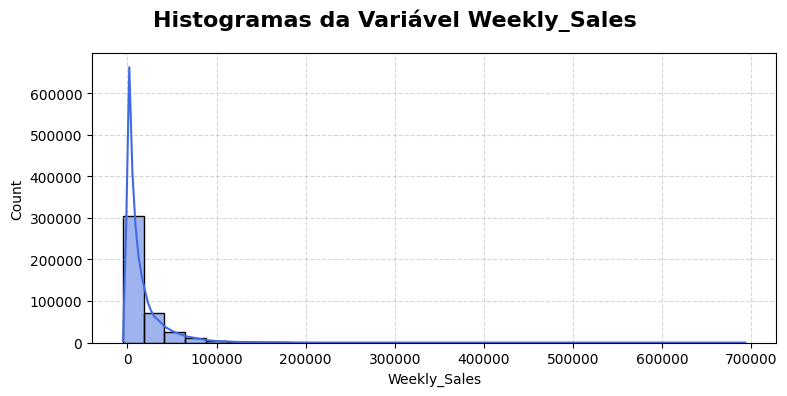

In [ ]:
plt.figure(figsize=(8, 4))
plt.suptitle("Histogramas da Variável Weekly_Sales", fontsize=16, fontweight='bold')
sns.histplot(train['Weekly_Sales'] ,bins=30, kde=True, color='royalblue')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

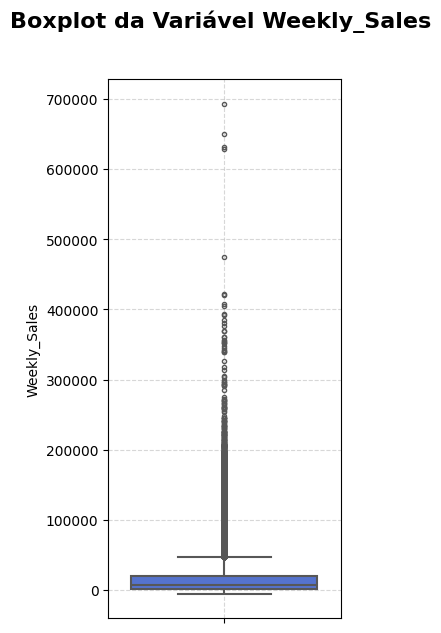

In [ ]:
plt.figure(figsize=(3,7))
plt.suptitle("Boxplot da Variável Weekly_Sales", fontsize=16, fontweight='bold')
sns.boxplot(y=train['Weekly_Sales'], color="royalblue", fliersize=3, linewidth=1.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

---

<br>

#### **Dataset Test**

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [ ]:
dimensao_test = test.shape

print(f'Número de observações: {dimensao_test[0]}')
print(f'Número de variáveis: {dimensao_test[1]}')

Número de observações: 115064
Número de variáveis: 4


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
# Número de departamentos por loja
for loja in test['Store'].unique():
  print(f'\nLoja: {loja}')
  departamento = test['Dept'][test['Store'] == loja].nunique()
  print(f'Número de departamentos: {departamento}')


Loja: 1
Número de departamentos: 74

Loja: 2
Número de departamentos: 75

Loja: 3
Número de departamentos: 67

Loja: 4
Número de departamentos: 75

Loja: 5
Número de departamentos: 70

Loja: 6
Número de departamentos: 74

Loja: 7
Número de departamentos: 72

Loja: 8
Número de departamentos: 73

Loja: 9
Número de departamentos: 69

Loja: 10
Número de departamentos: 75

Loja: 11
Número de departamentos: 73

Loja: 12
Número de departamentos: 71

Loja: 13
Número de departamentos: 75

Loja: 14
Número de departamentos: 74

Loja: 15
Número de departamentos: 73

Loja: 16
Número de departamentos: 73

Loja: 17
Número de departamentos: 73

Loja: 18
Número de departamentos: 75

Loja: 19
Número de departamentos: 74

Loja: 20
Número de departamentos: 76

Loja: 21
Número de departamentos: 70

Loja: 22
Número de departamentos: 70

Loja: 23
Número de departamentos: 73

Loja: 24
Número de departamentos: 75

Loja: 25
Número de departamentos: 73

Loja: 26
Número de departamentos: 72

Loja: 27
Número de d

In [ ]:
# Número de lojas
lojas = test['Store'].nunique()

# Número de dias observados
dias = test['Date'].nunique()

# Menor data
data_inicial = test['Date'].min()

# Maior data
data_final = test['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

Número de lojas: 45
Número de dias observador: 39
Data inicial: 2012-11-02
Data final: 2013-07-26


In [ ]:
# Valores faltantes
test_faltantes = test.isna().sum()
print(test_faltantes)

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


##### Verifica valores duplicados

In [ ]:
test.duplicated().sum()

0

---

<br>

#### **Resumo dos datasets**  
- Dataset *train*  
  - Possui 421570 observações divididas em 5 variáveis.
  - As observações foram coletadas ao longo de 143 dias, de 2010-02-05 a 2012-10-26.
  - Os dados foram obtidos a partir de 45 lojas que são especificadas por números sequenciais de 1 a 45.
  - Cada loja está dividida em departamentos, que pode variar de 63 a 79.
  - A cada tupla loja - departamento - data é atribuído o total de vendas semanais em US$.  
  - Este dataset não possui observações em branco.  
  - Este dataset não possui valores duplicados.  

- Dataset *test*  
  - Possui 115064 observações divididas em 4 variáveis.
  - As observações foram coletadas ao longo de 39 dias, de 2012-11-02 a 2013-07-26. Ou seja, é a continuação do dataset train.  
  - Os dados foram obtidos a partir das mesma 45 lojas e das mesmas seções presentes no dataset train.
  - O dataset também não possui valores em branco.
  - Este dataset não possui valores duplicados.
  - A principal diferença entre os datasets train e test é que o primeiro possui a variável Weekly_Sales, já o último não. Isto deve-se ao fato de que a base foi utilizada em um concurso no Kaggle onde o objetivo principal era estimar as vendas semanais do dataset test, a partir dos dados de treinamento do dataset train.  

- Dataset *features*  
  - Possui até 8190 observações divididas em 11 variáveis.  
  - As observações foram coletadas ao longo de 182 dias, de 2010-02-05 a 2013-07-26.  
  - Foram observados dados das mesmas 45 lojas presentes nos datasets train e test, porém sem levar em conta a divisão por departamentos.  
  - O dataset possui diversas observações em branco, com os seguintes percentuais de valores faltantes:
    - MarkDown1: 50,77%  
    - MarkDown2: 64,33%  
    - MarkDown3: 55,89%  
    - MarkDown4: 57,70%
    - MarkDown5: 50,55%
    - CPI: 7,14%
    - Unemployment: 7,14%  
  - As datas com valores faltantes são as mesmas para as variáveis CPI e Unemployment. Importante destacar que o período com dados ausentes vai de 03-05-2013 a 2013-07-26. Isto poderá ocasionar problemas ao utilizarmos o dataset test para a previsão das vendas.
  - O CPI ou Consumer Price Index é um índice de inflação utilizado nos EUA, semelhante ao IPCA brasileiro.
  - O índice de Unemployment (Taxa de Desemprego) nos Estados Unidos mede a porcentagem de pessoas da força de trabalho que estão desempregadas e ativamente procurando por emprego.  
  - Por se tratarem de índices oficiais e disponíveis na Internet, é possível buscar os valores faltantes complementando o dataset conforme a necessidade.  
  - Tendo em vista que as variáveis MarkDown 1 a 5 possuem mais de 50% de valores faltantes, optei por removê-las do dataset. A utilização de técnicas de imputação geraria erros de precisão, podendo comprometer a qualidade dos dados.  
   - Este dataset não possui valores duplicados.

- Dataset *stores*
  - Possui 45 observações divididas em 3 variáveis.  
  - Não possui valores em branco.  
   - Este dataset não possui valores duplicados.

<br>

---

### OBSERVAÇÃO  

O objetivo deste projeto é estudar o desempenho de modelos para séries temporais univariadas e multivariadas. Diante desta premissa, optei por utilizar a mesma base de dados para ambos estudos.  

Para o caso univariado utilizarei apenas o dataset *TRAIN*, onde manterei as variáveis *date* e *weekly_sales*, removendo todas as demais.  

Nos modelos multivariados consolidarei os datasets *features*, *stores* e *train*, utilizando tantas variáveis quanto possível.   

---






<br>




### Adequação do dataset train

In [ ]:
train_modificado = train[['Date', 'Weekly_Sales']]
train_modificado.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [ ]:
# Totalizar as vendas por data criando um dataframe com Date e Weekly_Sales, transformando Date em datetime
train_modificado = train_modificado.groupby('Date').sum().reset_index()
train_modificado['Date'] = pd.to_datetime(train_modificado['Date'])
train_modificado.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [ ]:
train_modificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


#### Dividir o dataset em treino e validação

Optei por utilizar 80% dos dados para treinamento e 20% para testes.

In [ ]:
df_treino = train_modificado.iloc[:int(0.8*len(train_modificado))].copy()
df_teste = train_modificado.iloc[int(0.8*len(train_modificado)):].copy()

#### Salvar o dataset modificado

In [ ]:
# Salvar df_treino e df_val
df_treino.to_csv('df_treino.csv')
df_teste.to_csv('df_teste.csv')

# Fazer download para a máquina local
files.download('df_treino.csv')
files.download('df_teste.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>